# Part 6B: KMeans Cluster Analysis

The goal of this notebook is to explore the clusters and try to find a cluster of reviews that shows signs of fake reviews.

Recall, signs of fake reviews include:
- extreme ratings
- unverified purchases
- grand claims
- shorter reviews

In [1]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in dataframe that was saved from KMeans modelling which contains cluster labels
df = pd.read_hdf('df_recon_25_kmeans.h5')

In [3]:
df.head()

,overall,verified,vote,review_word_count,summary_word_count,month,dayofweek,multipleReviews_reviewer,reviewer_five_star_only,reviewer_one_star_only,...,s_without,s_wonderful,s_work,s_work s_great,s_work s_well,s_worked,s_worth,s_would,s_year,cluster
0,-0.775258,0.130785,-0.000425,-0.019818,-0.016907,-0.390117,0.027182,-0.189801,-0.592289,0.899579,...,-0.001103,-0.004522,-0.022374,-0.006090,-0.004304,-0.003206,-0.005645,-0.004455,-0.002427,16
1,-0.027542,0.131010,-0.000566,-0.012916,0.021773,0.518848,0.027025,-0.189819,-0.591693,-0.100261,...,-0.006918,-0.004950,-0.021839,-0.004066,-0.015223,-0.000866,-0.004818,-0.000869,0.000219,7
2,-0.027449,0.131147,-0.000941,-0.027126,-0.013213,0.155418,0.527154,-0.189739,-0.591660,-0.099925,...,-0.003795,-0.006535,-0.022886,-0.006072,-0.017917,-0.006196,0.984855,-0.004369,-0.003650,7
3,0.221121,0.131100,-0.000310,-0.012637,-0.000041,-0.299398,-0.472866,-0.189783,0.409290,-0.099796,...,-0.001775,-0.003465,-0.021763,-0.005543,0.003075,-0.001060,-0.003278,-0.007252,0.000409,15
4,0.222099,0.130949,0.000121,0.004423,-0.004015,0.518907,0.527137,-0.189830,0.408338,-0.100702,...,-0.003217,-0.004468,-0.021190,-0.006283,-0.023773,-0.003040,-0.004445,-0.008995,-0.003038,21


Note that df was reconstructed from principal components so the values can be negative.

### Cluster Analysis

Let's begin by looking at the non-token features.

In [4]:
#getting names of non-token features and cluster for analysis
non_tokens_clust = list(df.columns[0:12]) + ['cluster']

In [5]:
#getting names of token features and cluster for analysis
tokens_clust = list(df.columns[12:])

#### Non-token Features
Let's look for clusters with mainly extreme ratings, unverified purchases, lower amount of helpful votes and shorter reviews.

##### Rating

In [7]:
#let's look at average rating by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
13    0.223134
14    0.223113
21    0.223107
18    0.223099
15    0.223097
19    0.223097
3     0.223084
4     0.223063
1     0.223062
10    0.223052
20    0.223051
22    0.223048
24    0.222991
12    0.220682
6    -0.027316
17   -0.106536
11   -0.129214
8    -0.185155
0    -0.206045
23   -0.212856
7    -0.217475
2    -0.276496
9    -0.525931
16   -0.776851
5    -0.776880
Name: overall, dtype: float64

From here we can see that about half of the clusters have a mean of 0.223 rating. As we know, the data was heavily skewed to high ratings (ie. 5) so this on its own is not informative. What is interesting though is clusters 5 and 16 have the lowest ratings.

##### Verified Purchase

In [8]:
#let's look at average verified purchase by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
11    0.131004
7     0.131001
15    0.130997
4     0.130985
3     0.130981
19    0.130977
21    0.130975
20    0.130969
1     0.097232
9     0.092485
2     0.083035
6     0.079025
12    0.078321
24    0.075816
18    0.075221
16    0.070596
10    0.051100
23    0.041967
14    0.034178
0    -0.000496
5    -0.032907
13   -0.084745
17   -0.125904
22   -0.869014
8    -0.869077
Name: verified, dtype: float64

Very interesting. **Clusters 22 and 8** both have the most negative values which indicate they have the largest number of **unverified** purchases. These are good candidates too look into further.

##### Votes

In [23]:
#let's look at average votes by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
8     0.000714
22    0.000612
0     0.000413
5     0.000339
14    0.000291
17    0.000212
13    0.000137
20    0.000025
7    -0.000001
15   -0.000010
19   -0.000013
21   -0.000041
11   -0.000050
23   -0.000069
3    -0.000122
4    -0.000126
12   -0.000131
9    -0.000251
16   -0.000252
10   -0.000312
1    -0.000329
2    -0.000333
6    -0.000335
18   -0.000337
24   -0.000338
Name: vote, dtype: float64

Clusters 22 and 8 have the highest number of votes. Strange considering they also had the highest number of unverified purchases.

##### Word Count

In [22]:
#let's look at average review word count by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,3].sort_values(ascending=False)

cluster
8     0.023168
22    0.017751
0     0.012748
17    0.012179
14    0.009647
13    0.006891
11    0.004582
7     0.004299
5     0.002956
23    0.002026
15    0.001277
21    0.001062
20    0.000951
19    0.000905
12   -0.001091
3    -0.002586
4    -0.002603
24   -0.012097
2    -0.012795
16   -0.012952
9    -0.013025
6    -0.013153
10   -0.013604
1    -0.013649
18   -0.014514
Name: review_word_count, dtype: float64

Clusters 22 and 8 have the largest review word counts - this makes sense since they have the largest number of votes since longer reviews tend to have more information so they are more helpful. However, these clusters also have the highest number of unverified purchases which is counter-intuitive. This needs to be looked into further.

#### Reviewer Behaviour
Let's look into **reviewer behaviour**. This may shed some more insight into whats happening in these clusters.

In [19]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
13    0.810170
17    0.810139
24    0.810090
14    0.809524
0     0.809156
23   -0.046427
6    -0.058021
2    -0.067159
9    -0.072113
3    -0.111843
12   -0.126895
16   -0.151322
5    -0.157405
20   -0.189606
18   -0.189824
1    -0.189834
10   -0.189835
11   -0.189841
7    -0.189841
8    -0.189844
21   -0.189851
19   -0.189853
4    -0.189856
15   -0.189860
22   -0.189862
Name: multipleReviews_reviewer, dtype: float64

Clusters 22 and 8 are part of the lower third of clusters that have the lowest number of reviewers posting more than 1 review (ie. most reviewers post only 1 review). This sort of makes makes sense since these clusters also happen to have the highest number of unverified purchases and as we have seen before, there is a limit on the number of reviews that can be given with unverified purchases.

In contrast, clusters 13, 17, 24, 14 and 0 have the highest number of reviewers with more than 1 review. We want to keep an eye out for those clusters as well as one of our assumptions was that fake reviewers could be incentivized to give a lot of fake 5 star reviews.

In [20]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,8].sort_values(ascending=False)

cluster
14    0.408039
22    0.408026
4     0.408025
20    0.408022
3     0.408020
21    0.408018
19    0.408018
15    0.408015
13    0.407986
18    0.407876
1     0.407813
10    0.407768
12    0.398355
24    0.240673
6    -0.591830
9    -0.591954
17   -0.591957
5    -0.591979
23   -0.591990
7    -0.591992
2    -0.591998
16   -0.592000
8    -0.592008
0    -0.592023
11   -0.592025
Name: reviewer_five_star_only, dtype: float64

Cluster 22 among highest cluster with only 5-star reviewers. Notice cluster 8 is amongst the lowest. It you scroll up, it also did not possess extreme ratings as it was in the middle of the pack. This eliminates cluster 8 as we would expect extreme ratings from fake reviews.

From the newly mentioned, clusters 14, 13 and 24 have high amount of 5-star reviewers. Let's revisit their features from above.
- all had among the highest overall ratings
- cluster 13 (and somewhat 14,24) had low amount of verified purchases
- clusters 13 and 14 had high amount of votes where as 24 had the lowest (this raises suspicion on cluster 24)
- clusters 13 and 14 had higher word counts where as 24 was amongst the lowest (this raises further suspicions on cluster 24)
- and as we have seen, all had high amount of reviewers that post multiple reviews

Based on the above, I want to keep a close eye on **cluster 24 and 22** as we move along the analysis.

In addition, I went back and identified cluster 18 as having almost identical features as cluster 24. The main difference between the 2 is cluster 24 has many reviewers that posted more than 1 review where as cluster 18 is the opposite. So I will include **cluster 18** in further analysis as well.

#### Top Tokens per cluster
Let's look at the top tokens per cluster.

In [24]:
#getting the mean token value per cluster
df_tokens = df.loc[:,tokens_clust].groupby('cluster').mean() 

In [25]:
#getting review tokens
df_review = df_tokens.iloc[:,0:1153]

In [26]:
#gettings summary tokens
df_summary = df_tokens.iloc[:,1153:]

In [28]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 22
cluster=22
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_skin         0.022568
r_razor        0.013561
r_product      0.013151
r_using        0.011240
r_hair         0.011105
r_review       0.010927
r_shave        0.010418
r_ive          0.010025
r_face         0.009837
r_use          0.009801
r_feel         0.009543
r_used         0.009429
r_also         0.009342
r_cream        0.009123
r_day          0.008566
r_recommend    0.008131
r_year         0.007840
r_eye          0.007703
r_amazing      0.007348
r_shaver       0.007331
Name: 22, dtype: float64
s_great    0.037677
s_love     0.032237
s_best     0.027594
Name: 22, dtype: float64


There is no clear trend in the top words in cluster 22. Let's look at cluster 24.

In [37]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 24
cluster=24
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_love                   0.059927
r_great                  0.048390
r_good                   0.028893
r_great r_product        0.016714
r_excellent              0.015234
r_nice                   0.011589
r_work r_great           0.010057
r_thank                  0.009268
r_perfect                0.009075
r_beautiful              0.007560
r_good r_product         0.007318
r_product                0.006703
r_favorite               0.006528
r_thanks                 0.006233
r_awesome                0.005321
r_excellent r_product    0.004746
r_love r_product         0.004593
r_best                   0.004534
r_blush                  0.004309
r_described              0.004086
Name: 24, dtype: float64
s_five s_star    0.492332
s_five           0.492275
s_star           0.382379
Name: 24, dtype: float64


Ok this is clear. There are more general positive terms in this cluster. This fits perfectly in our description of fake reviews which would use more general postive terms and lacking personal details.

Cluster 24 is emerging as a clear candidate.

In [38]:
#now let's print the top 20 review tokens and top 3 summary tokens for cluster 18
cluster=18
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])
print(df_summary.iloc[cluster,:].sort_values(ascending=False)[0:3])

r_love                   0.068001
r_great                  0.042623
r_good                   0.030749
r_perfect                0.018975
r_great r_product        0.018291
r_excellent              0.013513
r_awesome                0.011508
r_nice                   0.009661
r_amazing                0.009618
r_loved                  0.009607
r_product                0.008806
r_thank                  0.007181
r_work r_great           0.006084
r_thanks                 0.005791
r_good r_product         0.004858
r_love r_product         0.004644
r_excellent r_product    0.004246
r_beautiful              0.004180
r_wonderful              0.003551
r_best                   0.003237
Name: 18, dtype: float64
s_five s_star    0.492297
s_five           0.492256
s_star           0.382085
Name: 18, dtype: float64


Just like cluster 24, cluster 18 contains general positive terms so cluster 18 is also a candidate for fake reviews.

Now let's visualize the top tokens that are associated with grand claims (e.g. best product ever!) and let's see which clusters have the highest amount of these tokens

### Visualizing tokens

Let's look at some tokens e.g. excellent, love and great product.

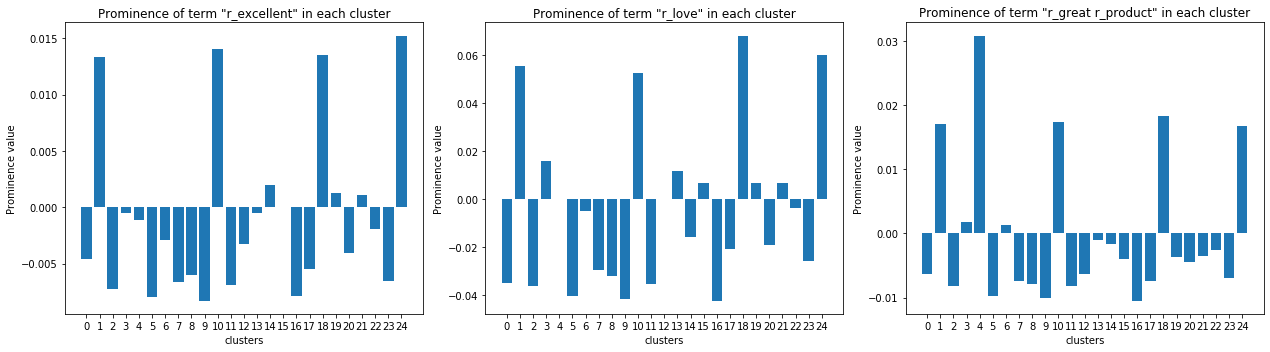

In [53]:
tokens = ['r_excellent','r_love','r_great r_product']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(1,3, figsize=(18,5))
for token in range(len(tokens)):
    plt.subplot(1,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

As can be seen, clusters 24 and 18 are among the highest, if not highest, clusters for the words excellent, love and great product. We can therefore conclude that these clusters are of lower quality given the shorter word lengths and use of general positive terms. This gives credenece that if fake reviews existed, they would most likely be contained within these 2 clusters.

When I did LDA topic modelling, I noticed one topic had prominent terms such as exchange, discount, received product, unbiased and honest review which all indicate that some reviews were given in exchange for product. These are highly concerning because these reviews may be unreliable. Let's see if we can find a cluster with these terms from the Kmeans model.

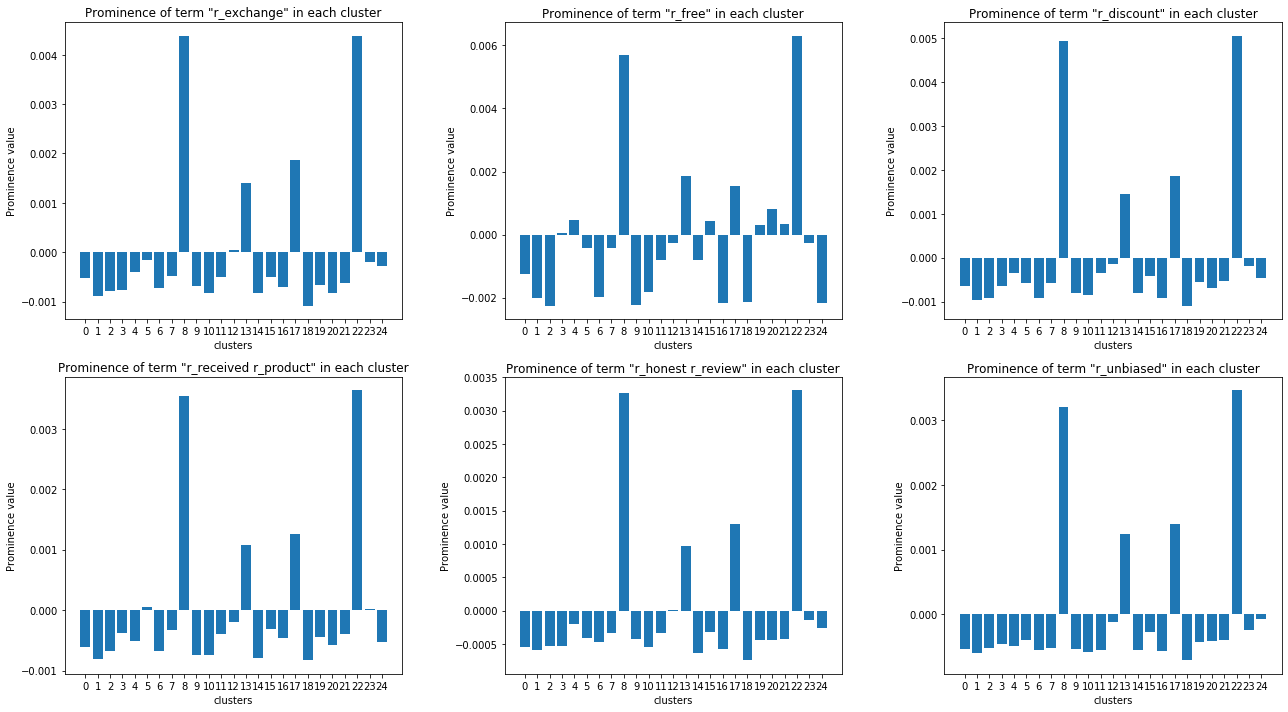

In [55]:
tokens = ['r_exchange','r_free','r_discount','r_received r_product','r_honest r_review', 'r_unbiased']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(2,3, figsize=(18,10))
for token in range(len(tokens)):
    plt.subplot(2,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

Wow! Cluster 22 (and 8) has the highest values for all the terms mentioned. This solves the mystery of cluster 22. Seemingly people were giving 'honest' or 'unbiased' reviews in exchange for receiving product for free or at a discount. This may explain why the word count is longer as people were trying to give proper reviews of the products. Perhaps the reason there is low amount of verified purchases is beacuse the reviewers were given the product for free externally from Amazon in exchange for reviews. 

This means these reviews aren't necessarily fake but they may be unreliable because the reviews in cluster 22 are all 5 stars so seemingly the reviewers are more incentivized to give good reviews even though they claim to be giving unbiased reviews. As opposed to cluster 8, which only has 2, 3 and 4 star reviews which seems to contain more realistic reviews.

#### Conclusion:
- clusters 24 and 18 have the most telltale features of fake reviews (5 stars, low word count, use of general positive terms)
- the key difference between clusters 24 and 18 is reviewer behaviour. Reviewers in cluster 24 post more than 1 review where as in 18, they have only posted 1 review. This may indicate that some fake reviewers review multiple products where as in other cases, reviewers use different accounts perhaps to review the same product.
- cluster 22 contains reviews of people who may have been incentivized to give good reviews; this does not necessarily mean the reviews are fake but they may be unreliable